# Time series EDA

# EDA with Time Series Data

In [31]:
# Pandas data reader: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
# Install Pandas data reader with "pip install pandas.datareader"

In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [44]:
df_tesla= pdr.get_data_yahoo('TSLA')
type(df_tesla)

pandas.core.frame.DataFrame

In [45]:
df_tesla.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-11,915.960022,850.700012,909.630005,860.000000,26492700.0,860.000000
2022-02-14,898.880005,853.150024,861.570007,875.760010,22585500.0,875.760010
2022-02-15,923.000000,893.380005,900.000000,922.429993,19216500.0,922.429993
2022-02-16,926.429993,901.210022,914.049988,923.390015,17098100.0,923.390015
2022-02-17,918.500000,874.099976,913.260010,876.349976,18392800.0,876.349976
2022-02-18,886.869995,837.609985,886.000000,856.979980,22710500.0,856.979980
2022-02-22,856.729980,801.099976,834.130005,821.530029,27762700.0,821.530029
2022-02-23,835.299988,760.559998,830.429993,764.039978,31752300.0,764.039978
2022-02-24,802.479980,700.000000,700.390015,800.770020,45107400.0,800.770020


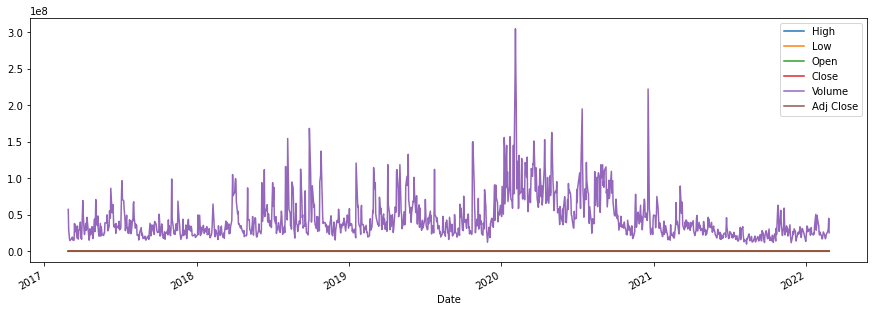

In [46]:
df_tesla.plot(figsize=(15,5))

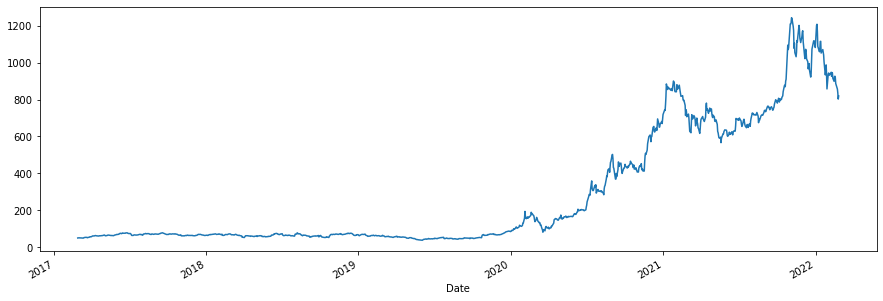

In [47]:
df_tesla['High'].plot(figsize=(15,5))

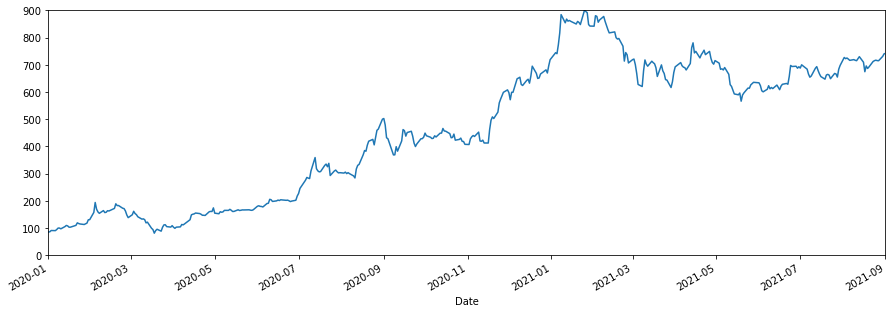

In [48]:
## X limit & Y limit
df_tesla['High'].plot(xlim=['2020-01-01', '2021-09-01'], ylim=[0, 900], figsize=(15,5))

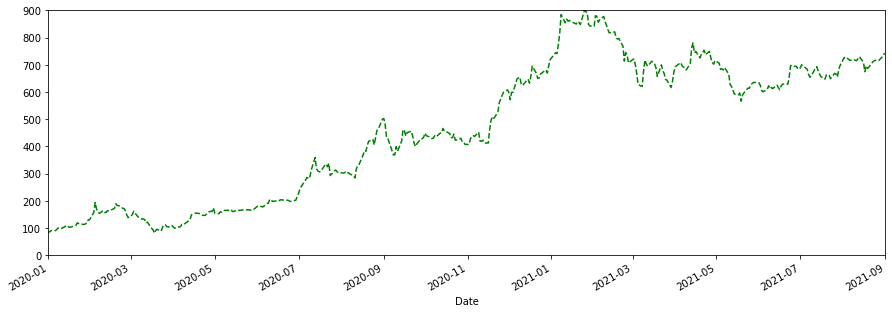

In [49]:
## Apply colouring & LineStyle
df_tesla['High'].plot(xlim=['2020-01-01', '2021-09-01'], ylim=[0, 900], figsize=(15,5), ls='--', c='green')

In [50]:
## Acessing the indexs of the rows
df_tesla.index
df_tesla.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [51]:
## Acessing specific Date/Days(Rows) and/or Columns
selective_index= df_tesla['2021-01-01':'2022-01-15'].index
selective_share_open= df_tesla.loc['2021-01-01':'2022-01-15']['Open']    

share_open_close= df_tesla.loc['2022-01-01':'2022-01-15'][['Open', 'Close']]
share_open_close.head()

,Open,Close
Date,,
2022-01-03,1147.750000,1199.780029
2022-01-04,1189.550049,1149.589966
2022-01-05,1146.650024,1088.119995
2022-01-06,1077.000000,1064.699951
2022-01-07,1080.369995,1026.959961


In [52]:
## libaries for visualization
import matplotlib.pyplot as plt
%matplotlib inline

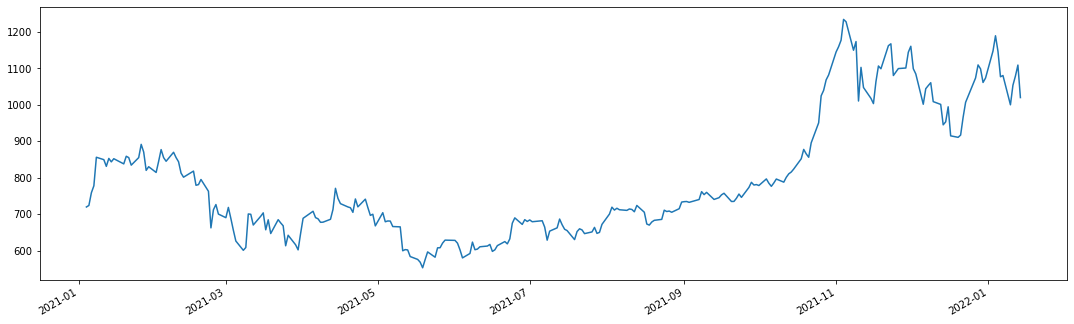

In [53]:
## Visualizing different subplots
figure, axis= plt.subplots(figsize=(15,5))
# Preventing overlapping
plt.tight_layout() # to make x-axis label little open
figure.autofmt_xdate() # Preventing overlaping og x_data

axis.plot(selective_index, selective_share_open)

# DateTime Index

In [54]:
# Making date index as a date column by assiging new index
df_tesla= df_tesla.reset_index()
df_tesla.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
1,2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2,2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002


In [55]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1260 non-null   datetime64[ns]
 1   High       1260 non-null   float64       
 2   Low        1260 non-null   float64       
 3   Open       1260 non-null   float64       
 4   Close      1260 non-null   float64       
 5   Volume     1260 non-null   float64       
 6   Adj Close  1260 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [56]:
# change date column to datetime object
pd.to_datetime(df_tesla['Date'])

# Set Date column as a index column again!
df_tesla= df_tesla.set_index('Date', drop=True)
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999


# DateTime

In [57]:
# Import datetime library
from datetime import datetime

In [58]:
datetime(2021, 11, 21)    # Acessng the particular time!

datetime.datetime(2021, 11, 21, 0, 0)

In [59]:
datetime.now()    # Time right now!

datetime.datetime(2022, 2, 26, 15, 7, 45, 652638)

In [60]:
# Function to add two numbers
def add_num(bun1, num2):
    return num1+num2

# Use of datetime object 
start_time= datetime.now()
num1= 20
num2= 30

add_num(num1, num2)
end_time= datetime.now()

print("Total time to execute this cell is =>", end_time - start_time)

Total time to execute this cell is => 0:00:00


In [61]:
# Acessing date object
date= datetime(2021, 11, 21)

print(date)
print(date.date)
print(date.day)
print(date.weekday())
print(date.year)
print(date.month)

2021-11-21 00:00:00
<built-in method date of datetime.datetime object at 0x0000018F26ACFDE0>
21
6
2021
11


# Time Resampling (Day, Months, Quater, Year)

In [62]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999


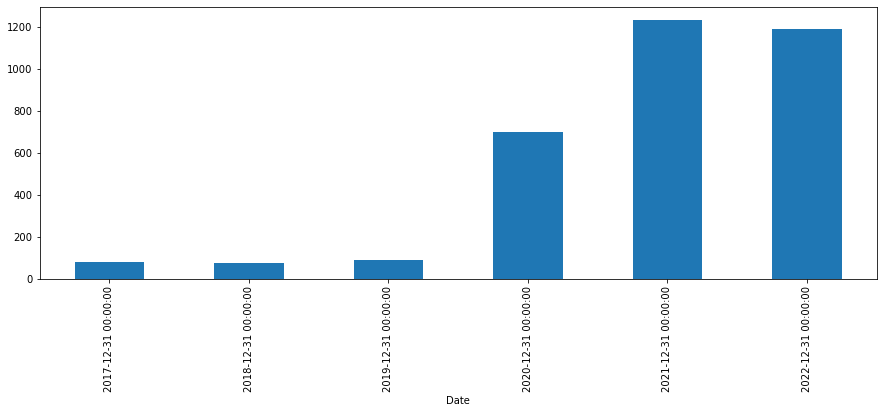

In [63]:
## Plotting by acessing different time (fx: Year, Quater, Months)
df_tesla['Open'].resample(rule='A').max().plot(kind='bar', figsize=(15, 5))

In [64]:
# Business End Frequency (yearly update)
df_tesla.resample(rule='BA').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,77.921997,75.870003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-30,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


# Simple Moving: Rolling & Spaning
- Doing Average or Max value [min() or max()] with certain number of rows

In [65]:
df_tesla['High'].rolling(10).mean().head(15)

Date
2017-02-27        NaN
2017-02-28        NaN
2017-03-01        NaN
2017-03-02        NaN
2017-03-03        NaN
2017-03-06        NaN
2017-03-07        NaN
2017-03-08        NaN
2017-03-09        NaN
2017-03-10    50.2042
2017-03-13    50.1740
2017-03-14    50.3164
2017-03-15    50.4394
2017-03-16    50.6888
2017-03-17    50.9574
Name: High, dtype: float64

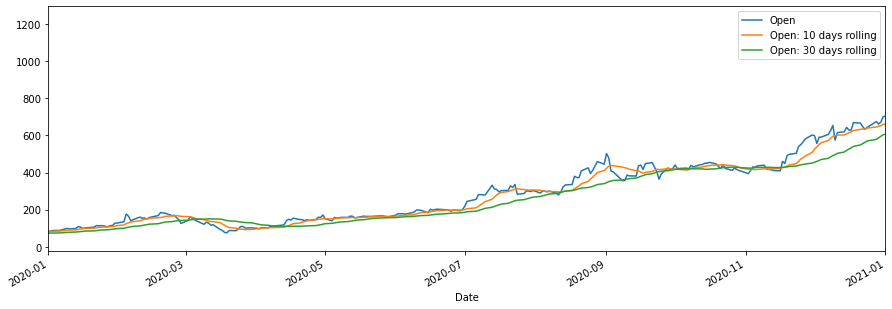

In [79]:
df_tesla['Open: 10 days rolling']= df_tesla['Open'].rolling(window=10, min_periods=1).mean()
df_tesla['Open: 30 days rolling']= df_tesla['Open'].rolling(window=30, min_periods=1).mean()
df_tesla[["Open", 'Open: 10 days rolling', 'Open: 30 days rolling']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15,5))

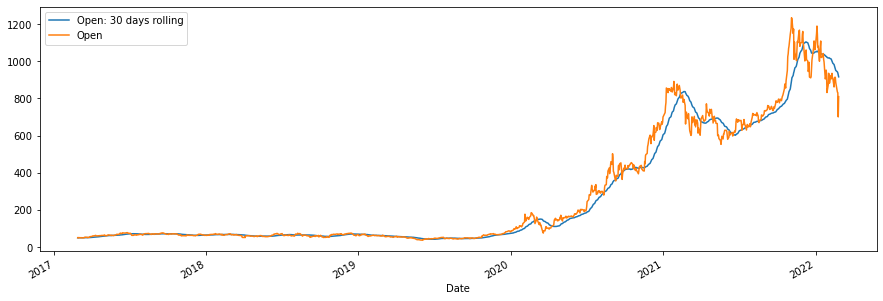

In [89]:
df_tesla[['Open: 30 days rolling', 'Open']].plot(figsize=(15,5))

## Assignment ##News
1. read the microsoft data using Pandas data reader
2. get the maximum price of the stock year from 2017 to 2022
3. Which is the date of the higest price of the stock?
4. Which is date of the lowest price of the stock?

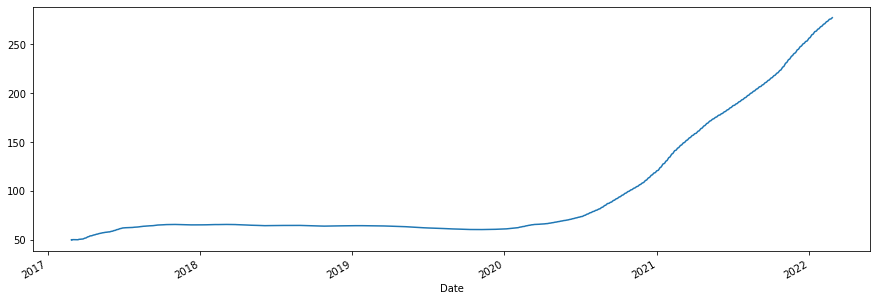

In [83]:
# CMA: Cumulative Moving Average by using "Expanding"
df_tesla["Open"].expanding().mean().plot(figsize=(15,5))


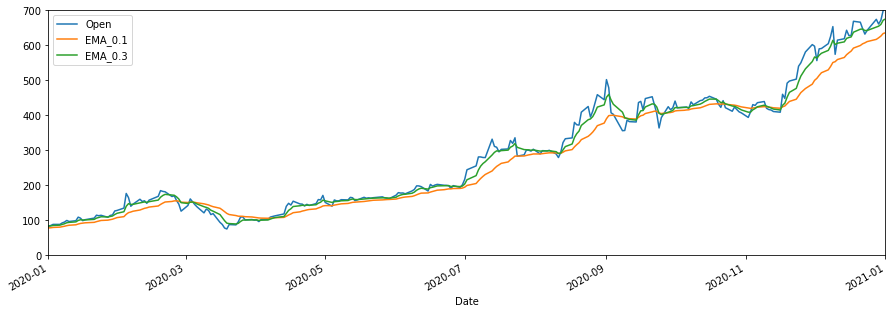

In [98]:
# EMWA- Exponential Moving Average with "AWlpha Value"
df_tesla["EMA_0.1"]= df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()
df_tesla["EMA_0.3"]= df_tesla['Open'].ewm(alpha=0.3, adjust=False).mean()
df_tesla[["Open", "EMA_0.1", "EMA_0.3"]].plot(ylim=[0, 700], xlim=['2020-01-01', '2021-01-01'], figsize=(15,5))

In [ ]:
# ARIMA
ARIMA